<a href="https://colab.research.google.com/github/utrionedv/matstat_kursa4/blob/main/%D0%BF%D1%806_%D0%B1%D1%83%D0%B4%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson

In [ ]:
m_values = [3,5,7,9]
alpha_values = np.arange(0.1, 1.0, 0.1)
gamma_values = np.arange(0.1, 1.0, 0.1)
y1 = pd.read_csv("/content/1.txt")
y1= y1.to_numpy()
y2 = pd.read_csv("/content/2.txt")
y2= y2.to_numpy()


In [ ]:
def sma(y, m):
    w = 2*m + 1
    yt = []
    y = np.concatenate(([y[0]] * m, y, [y[-1]] * m))
    n = len(y)
    for i in range(m, n - m + 1):
      wsum = sum(y[i-m:i+m+1])
      sma = wsum / w
      yt.append(sma)
    yt=yt[:-1]
    return yt

def optimize_sma(y, m_values):
    best_q_stat = float('inf')
    best_m = 0
    for m in m_values:
        w = 2 * m + 1
        yt = sma(y, m)
        residuals = y - yt
        q_stat = acorr_ljungbox(residuals, lags=5, return_df=True)['lb_stat'].sum()
        if q_stat < best_q_stat:
            best_q_stat = q_stat
            best_w = w
            best_m = m
    return best_w, best_q_stat, best_m

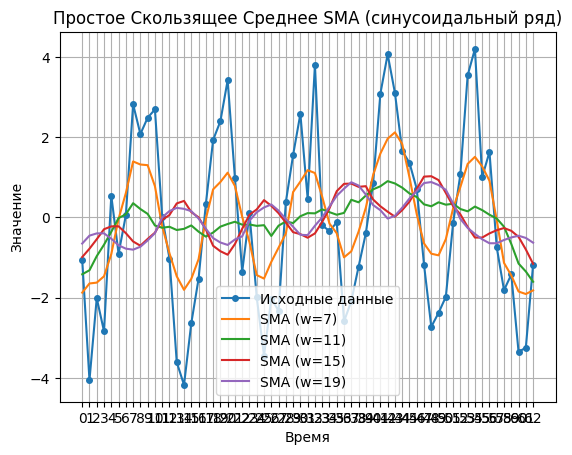

Лучшее окно для SMA (синусоидальный ряд): 7 Q-статистика: 79.10278735007148
Дарбин-Уотсон SMA (синусоидальный ряд): [1.31228933]


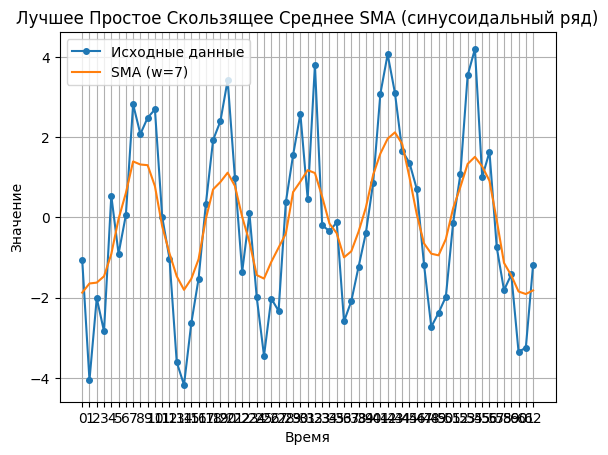

In [ ]:
plt.plot(y1, label='Исходные данные', marker='o', markersize=4)

for m in m_values:
    sma_values = sma(y1, m)
    plt.plot(sma_values, label=f'SMA (w={2*m+1})')
plt.title('Простое Скользящее Среднее SMA (синусоидальный ряд)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(range(len(y1)))
plt.legend()
plt.grid()
plt.show()


best_window, q_stat, best_m = optimize_sma(y1, m_values)
print("Лучшее окно для SMA (синусоидальный ряд):", best_window, "Q-статистика:", q_stat)
yt_best = sma(y1, best_m)
residuals = y1 - yt_best
dw_stat = durbin_watson(residuals)
print("Дарбин-Уотсон SMA (синусоидальный ряд):", dw_stat)

plt.plot(y1, label='Исходные данные', marker='o', markersize=4)
plt.plot(yt_best, label=f'SMA (w={best_window})')
plt.title('Лучшее Простое Скользящее Среднее SMA (синусоидальный ряд)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(range(len(y1)))
plt.legend()
plt.grid()
plt.show()

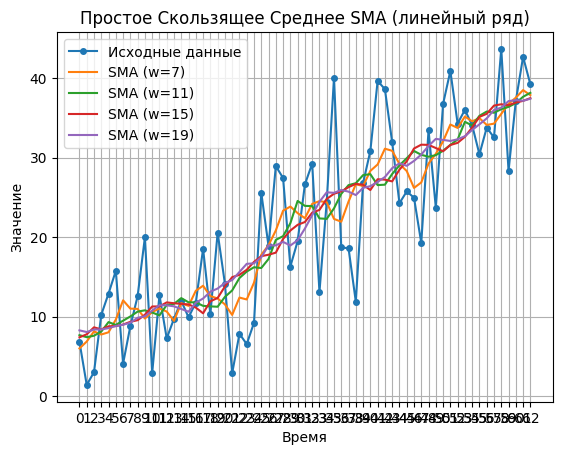

Лучшее окно для SMA (линейный ряд): 19 Q-статистика: 23.21899293403834
Дарбин-Уотсон SMA (линейный ряд): [1.70007517]


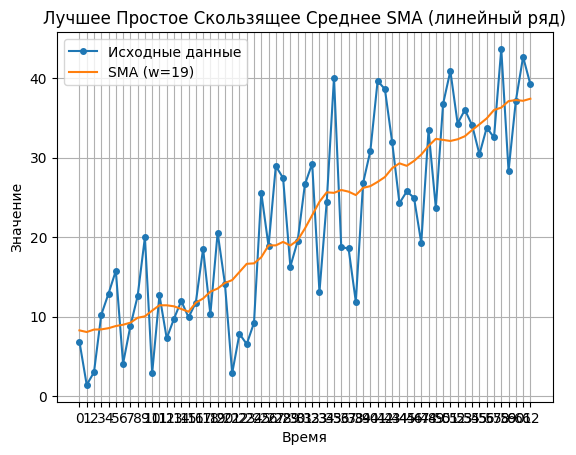

In [ ]:
plt.plot(y2, label='Исходные данные', marker='o', markersize=4)

for m in m_values:
    sma_values = sma(y2, m)
    plt.plot(sma_values, label=f'SMA (w={2*m+1})')
plt.title('Простое Скользящее Среднее SMA (линейный ряд)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(range(len(y2)))
plt.legend()
plt.grid()
plt.show()

best_window, q_stat, best_m = optimize_sma(y2, m_values)
print("Лучшее окно для SMA (линейный ряд):", best_window, "Q-статистика:", q_stat)
yt_best = sma(y2, best_m)
residuals = y2 - yt_best
dw_stat = durbin_watson(residuals)
print("Дарбин-Уотсон SMA (линейный ряд):", dw_stat)


plt.plot(y2, label='Исходные данные', marker='o', markersize=4)
plt.plot(yt_best, label=f'SMA (w={best_window})')
plt.title('Лучшее Простое Скользящее Среднее SMA (линейный ряд)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(range(len(y2)))
plt.legend()
plt.grid()
plt.show()

In [ ]:
def wma(y, m):
  eps = 0.3
  yt = []
  y = np.concatenate(([y[0]] * m, y, [y[-1]] * m))
  n = len(y)
  j = np.arange(-m, m + 1)
  w = np.exp(-eps * np.abs(j))
  w /= np.sum(w)
  for t in range(m, n - m):
    wma = sum(y[t + i] * w[i + m] for i in range(-m, m + 1))
    yt.append(wma)
  return yt
def optimize_wma(y, m_values):
    best_q_stat = float('inf')
    best_m = 0
    for m in m_values:
        w = 2 * m + 1
        yt = wma(y, m)
        residuals = y - yt
        q_stat = acorr_ljungbox(residuals, lags=5, return_df=True)['lb_stat'].sum()
        if q_stat < best_q_stat:
            best_q_stat = q_stat
            best_w = w
            best_m = m
    return best_w, best_q_stat, best_m

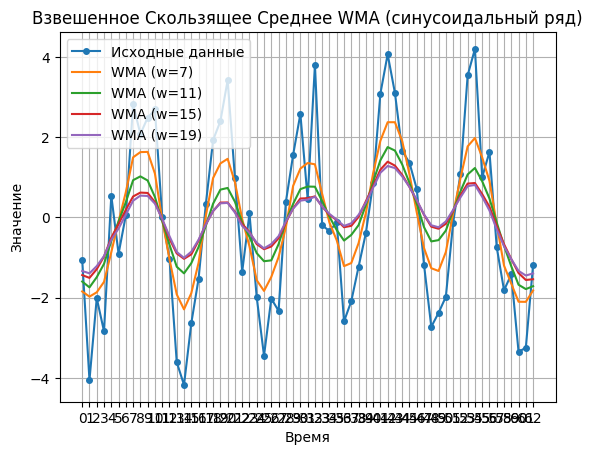

Лучшее окно для WMA (синусоидальный ряд): 7 Q-статистика: 39.186307781078455
Дарбин-Уотсон WMA (синусоидальный ряд): [1.61757391]


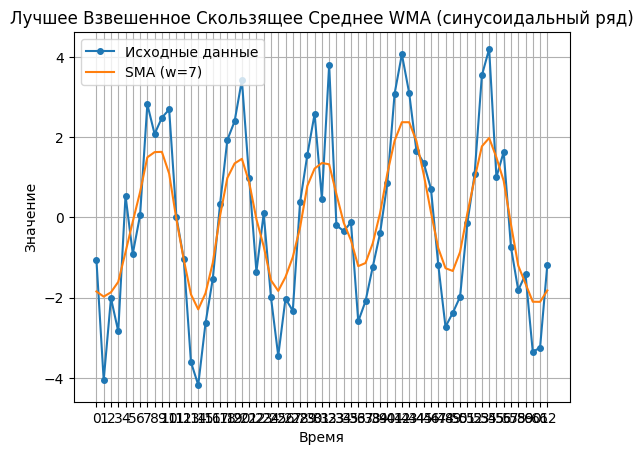

In [ ]:
plt.plot(y1, label='Исходные данные', marker='o', markersize=4)

for m in m_values:
    wma_values = wma(y1, m)
    plt.plot(wma_values, label=f'WMA (w={2*m+1})')
plt.title('Взвешенное Скользящее Среднее WMA (синусоидальный ряд)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(range(len(y1)))
plt.legend()
plt.grid()
plt.show()


best_window, q_stat, best_m = optimize_wma(y1, m_values)
print("Лучшее окно для WMA (синусоидальный ряд):", best_window, "Q-статистика:", q_stat)
yt_best = wma(y1, best_m)
residuals = y1 - yt_best
dw_stat = durbin_watson(residuals)
print("Дарбин-Уотсон WMA (синусоидальный ряд):", dw_stat)

plt.plot(y1, label='Исходные данные', marker='o', markersize=4)
plt.plot(yt_best, label=f'SMA (w={best_window})')
plt.title('Лучшее Взвешенное Скользящее Среднее WMA (синусоидальный ряд)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(range(len(y1)))
plt.legend()
plt.grid()
plt.show()

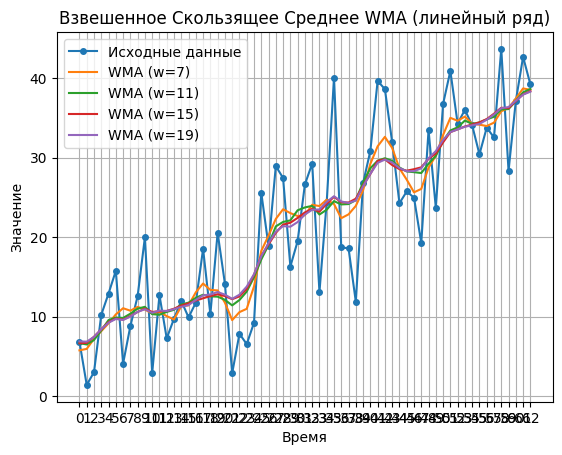

Лучшее окно для WMA (линейный ряд): 19 Q-статистика: 16.887727840926125
Дарбин-Уотсон WMA (линейный ряд): [1.95660163]


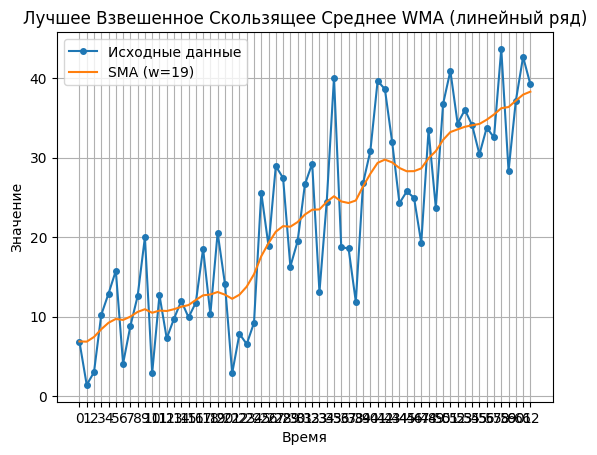

In [ ]:
plt.plot(y2, label='Исходные данные', marker='o', markersize=4)

for m in m_values:
    wma_values = wma(y2, m)
    plt.plot(wma_values, label=f'WMA (w={2*m+1})')
plt.title('Взвешенное Скользящее Среднее WMA (линейный ряд)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(range(len(y2)))
plt.legend()
plt.grid()
plt.show()


best_window, q_stat, best_m = optimize_wma(y2, m_values)
print("Лучшее окно для WMA (линейный ряд):", best_window, "Q-статистика:", q_stat)
yt_best = wma(y2, best_m)
residuals = y2 - yt_best
dw_stat = durbin_watson(residuals)
print("Дарбин-Уотсон WMA (линейный ряд):", dw_stat)

plt.plot(y2, label='Исходные данные', marker='o', markersize=4)
plt.plot(yt_best, label=f'SMA (w={best_window})')
plt.title('Лучшее Взвешенное Скользящее Среднее WMA (линейный ряд)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(range(len(y2)))
plt.legend()
plt.grid()
plt.show()

In [ ]:
def ema(y, alpha):
  yt = []
  yt.append(y[0])
  n = len(y)
  for i in range(1, n):
    yt.append(alpha*y[i] + (1-alpha)*y[i-1])
  return yt

def optimize_ema(y, alpha_values):
    best_q_stat = float('inf')
    for alpha in alpha_values:
        yt = ema(y, alpha)
        residuals = y - yt
        q_stat = acorr_ljungbox(residuals, lags=5, return_df=True)['lb_stat'].sum()
        if q_stat < best_q_stat:
            best_q_stat = q_stat
            best_alpha = alpha

    return best_alpha, best_q_stat

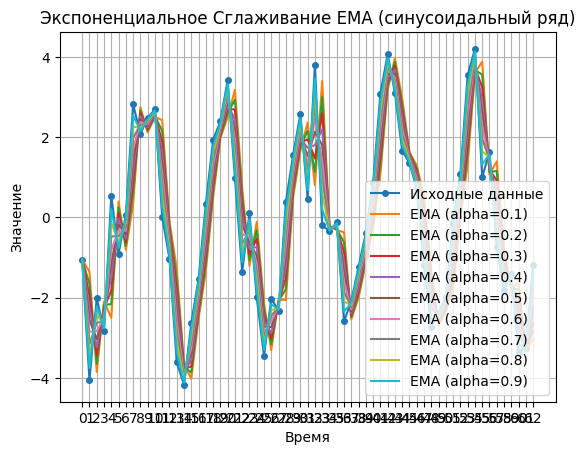

Лучший коэффициент сглаживания для EMA (синусоидальный ряд): 19 Q-статистика: 27.827850358956344
Дарбин-Уотсон EMA (синусоидальный ряд): [2.09037796]


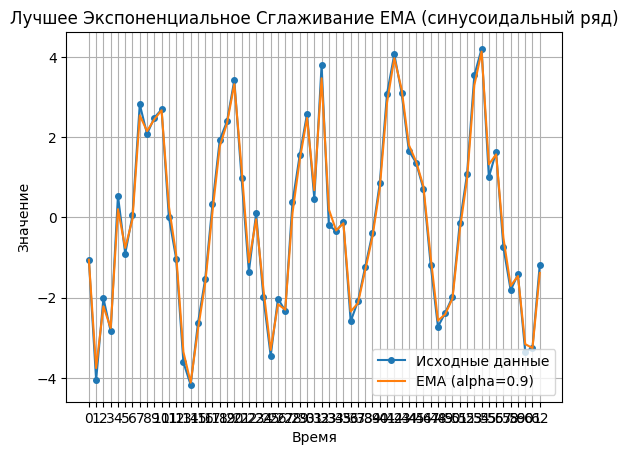

In [ ]:
plt.plot(y1, label='Исходные данные', marker='o', markersize=4)

for alpha in alpha_values:
    ema_values = ema(y1, alpha)
    plt.plot(ema_values, label=f'EMA (alpha={round(alpha, 1)})')
plt.title('Экспоненциальное Сглаживание EMA (синусоидальный ряд)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(range(len(y1)))
plt.legend()
plt.grid()
plt.show()


best_alpha, q_stat = optimize_ema(y1, alpha_values)
print("Лучший коэффициент сглаживания для EMA (синусоидальный ряд):", best_window, "Q-статистика:", q_stat)
yt_best = ema(y1, best_alpha)
residuals = y1 - yt_best
dw_stat = durbin_watson(residuals)
print("Дарбин-Уотсон EMA (синусоидальный ряд):", dw_stat)

plt.plot(y1, label='Исходные данные', marker='o', markersize=4)
plt.plot(yt_best, label=f'EMA (alpha={best_alpha})')
plt.title('Лучшее Экспоненциальное Сглаживание EMA (синусоидальный ряд)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(range(len(y1)))
plt.legend()
plt.grid()
plt.show()

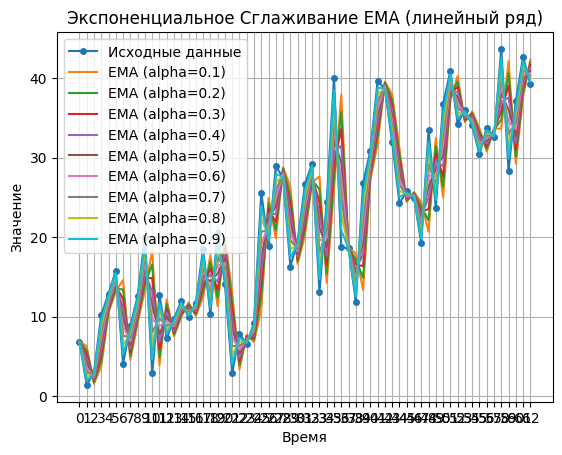

Лучший коэффициент сглаживания для EMA (линейный ряд): 0.4 Q-статистика: 50.48157419571263
Дарбин-Уотсон EMA (линейный ряд): [2.75013822]


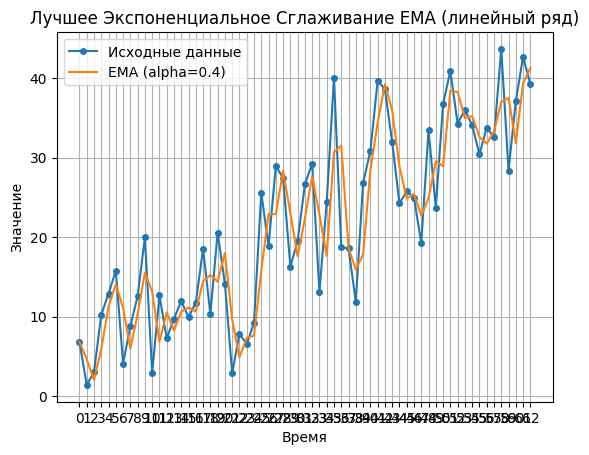

In [ ]:
plt.plot(y2, label='Исходные данные', marker='o', markersize=4)

for alpha in alpha_values:
    ema_values = ema(y2, alpha)
    plt.plot(ema_values, label=f'EMA (alpha={round(alpha, 1)})')
plt.title('Экспоненциальное Сглаживание EMA (линейный ряд)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(range(len(y2)))
plt.legend()
plt.grid()
plt.show()


best_alpha, q_stat = optimize_ema(y2, alpha_values)
print("Лучший коэффициент сглаживания для EMA (линейный ряд):", best_alpha, "Q-статистика:", q_stat)
yt_best = ema(y2, best_alpha)
residuals = y2 - yt_best
dw_stat = durbin_watson(residuals)
print("Дарбин-Уотсон EMA (линейный ряд):", dw_stat)

plt.plot(y2, label='Исходные данные', marker='o', markersize=4)
plt.plot(yt_best, label=f'EMA (alpha={best_alpha})')
plt.title('Лучшее Экспоненциальное Сглаживание EMA (линейный ряд)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(range(len(y2)))
plt.legend()
plt.grid()
plt.show()

In [ ]:
def dema(y, alpha,gamma):
  yt = []
  bt = []
  yt.append(y[0])
  bt.append(y[1]-y[0])
  n = len(y)
  for i in range(1, n):
    yt.append(alpha*y[i] + (1-alpha)*(y[i-1])+bt[i-1])
    bt.append(gamma*(yt[i]-yt[i-1])+(1-gamma)*bt[i-1])
  return yt
def optimize_dema(y, alpha_values, gamma_values):
    best_q_stat = float('inf')
    for alpha in alpha_values:
      for gamma in gamma_values:
        yt = dema(y, alpha, gamma)
        residuals = y - yt
        q_stat = acorr_ljungbox(residuals, lags=5, return_df=True)['lb_stat'].sum()
        if q_stat < best_q_stat:
            best_q_stat = q_stat
            best_alpha = alpha
            best_gamma = gamma
    return best_alpha,best_gamma, best_q_stat

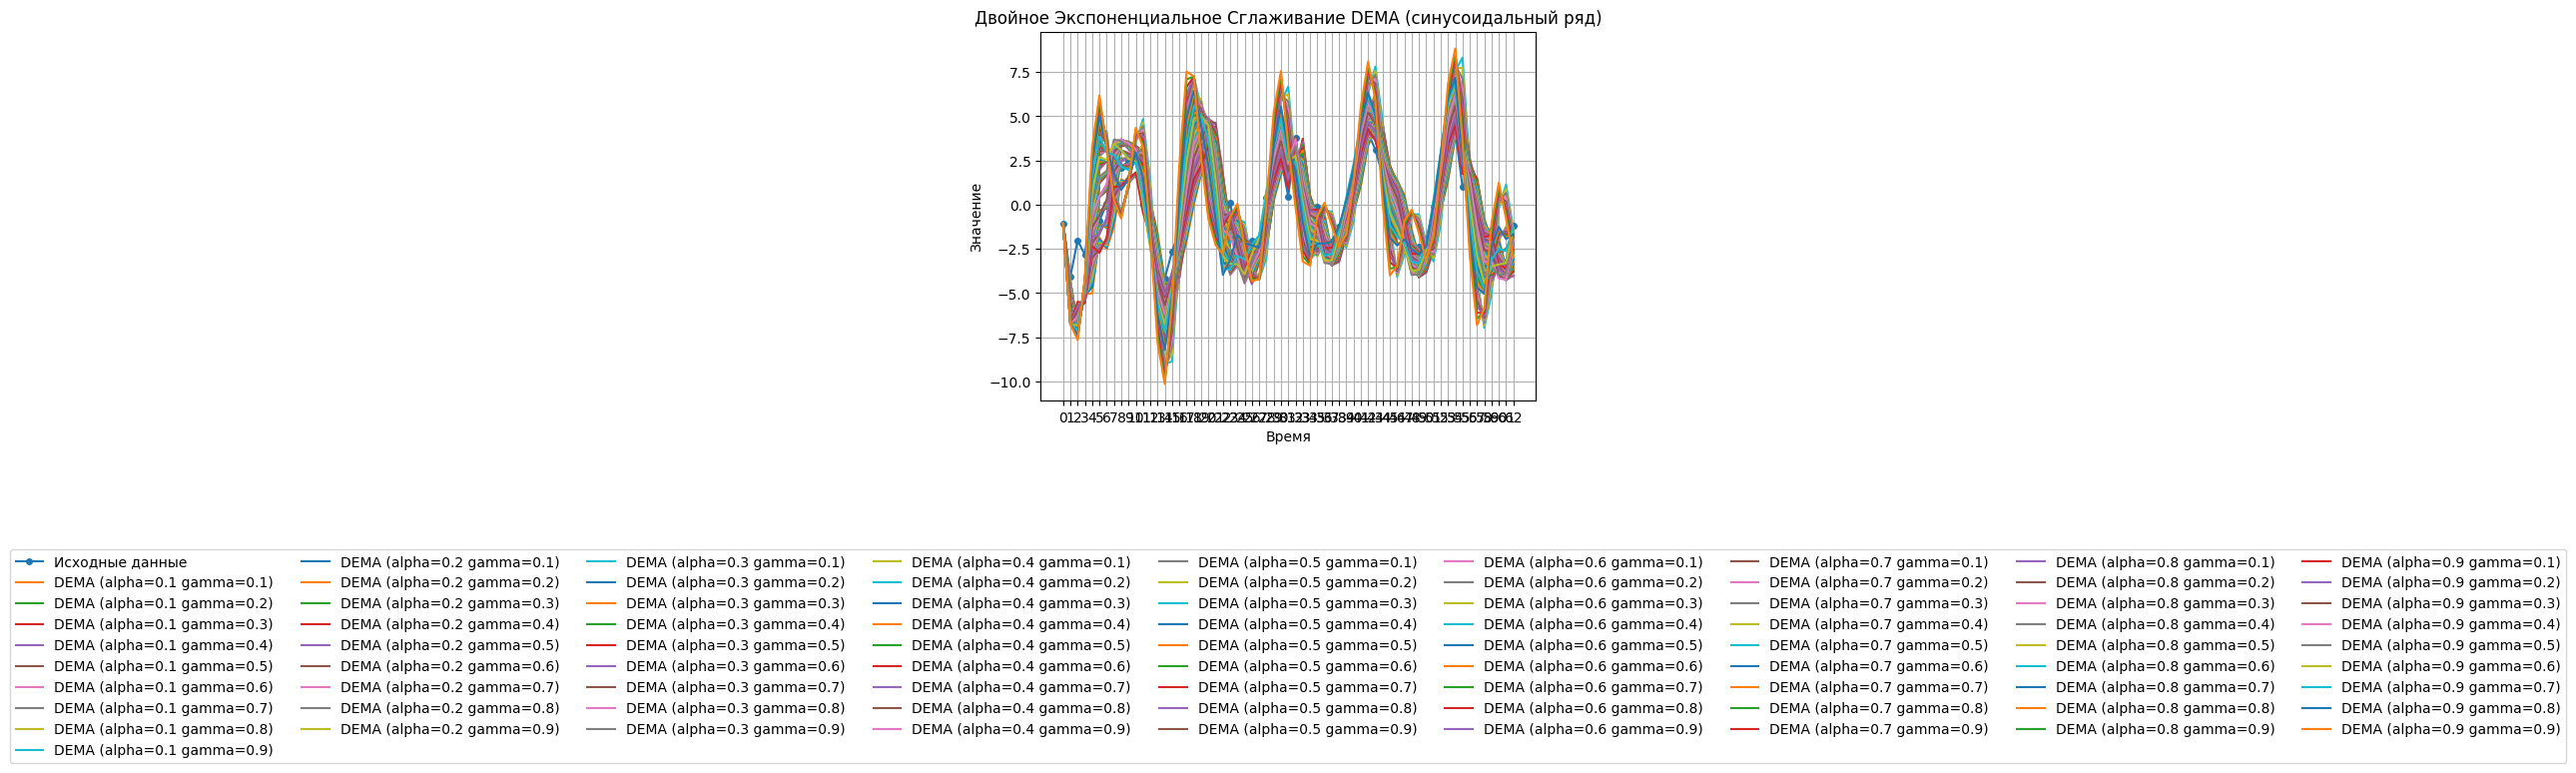

Лучший коэффициент сглаживания для DEMA (синусоидальный ряд): 19 Q-статистика: 60.76359621470481
Дарбин-Уотсон DEMA (синусоидальный ряд): [1.37815854]


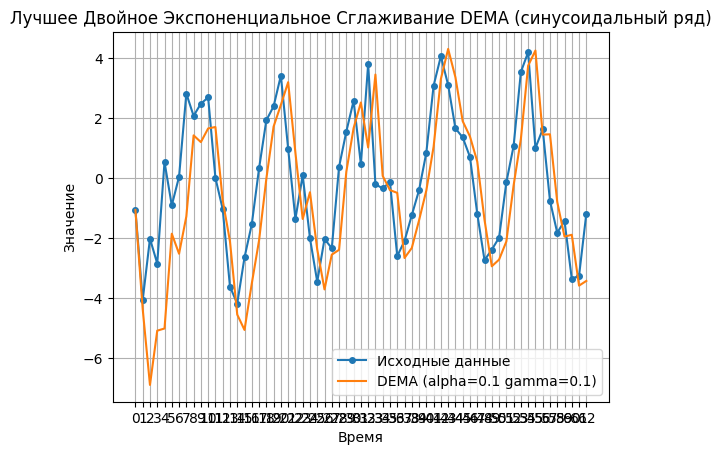

In [ ]:
plt.plot(y1, label='Исходные данные', marker='o', markersize=4)

for alpha in alpha_values:
  for gamma in gamma_values:
      dema_values = dema(y1, alpha,gamma)
      plt.plot(dema_values, label=f'DEMA (alpha={round(alpha, 1)} gamma={round(gamma, 1)})')
plt.title('Двойное Экспоненциальное Сглаживание DEMA (синусоидальный ряд)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(range(len(y1)))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -1), ncol=9)
plt.grid()
plt.show()


best_alpha,best_gamma, q_stat = optimize_dema(y1, alpha_values,gamma_values)
print("Лучший коэффициент сглаживания для DEMA (синусоидальный ряд):", best_window, "Q-статистика:", q_stat)
yt_best = dema(y1, best_alpha,best_gamma)
residuals = y1 - yt_best
dw_stat = durbin_watson(residuals)
print("Дарбин-Уотсон DEMA (синусоидальный ряд):", dw_stat)

plt.plot(y1, label='Исходные данные', marker='o', markersize=4)
plt.plot(yt_best, label=f'DEMA (alpha={round(best_alpha, 1)} gamma={round(best_gamma, 1)})')
plt.title('Лучшее Двойное Экспоненциальное Сглаживание DEMA (синусоидальный ряд)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(range(len(y1)))
plt.legend()
plt.grid()
plt.show()

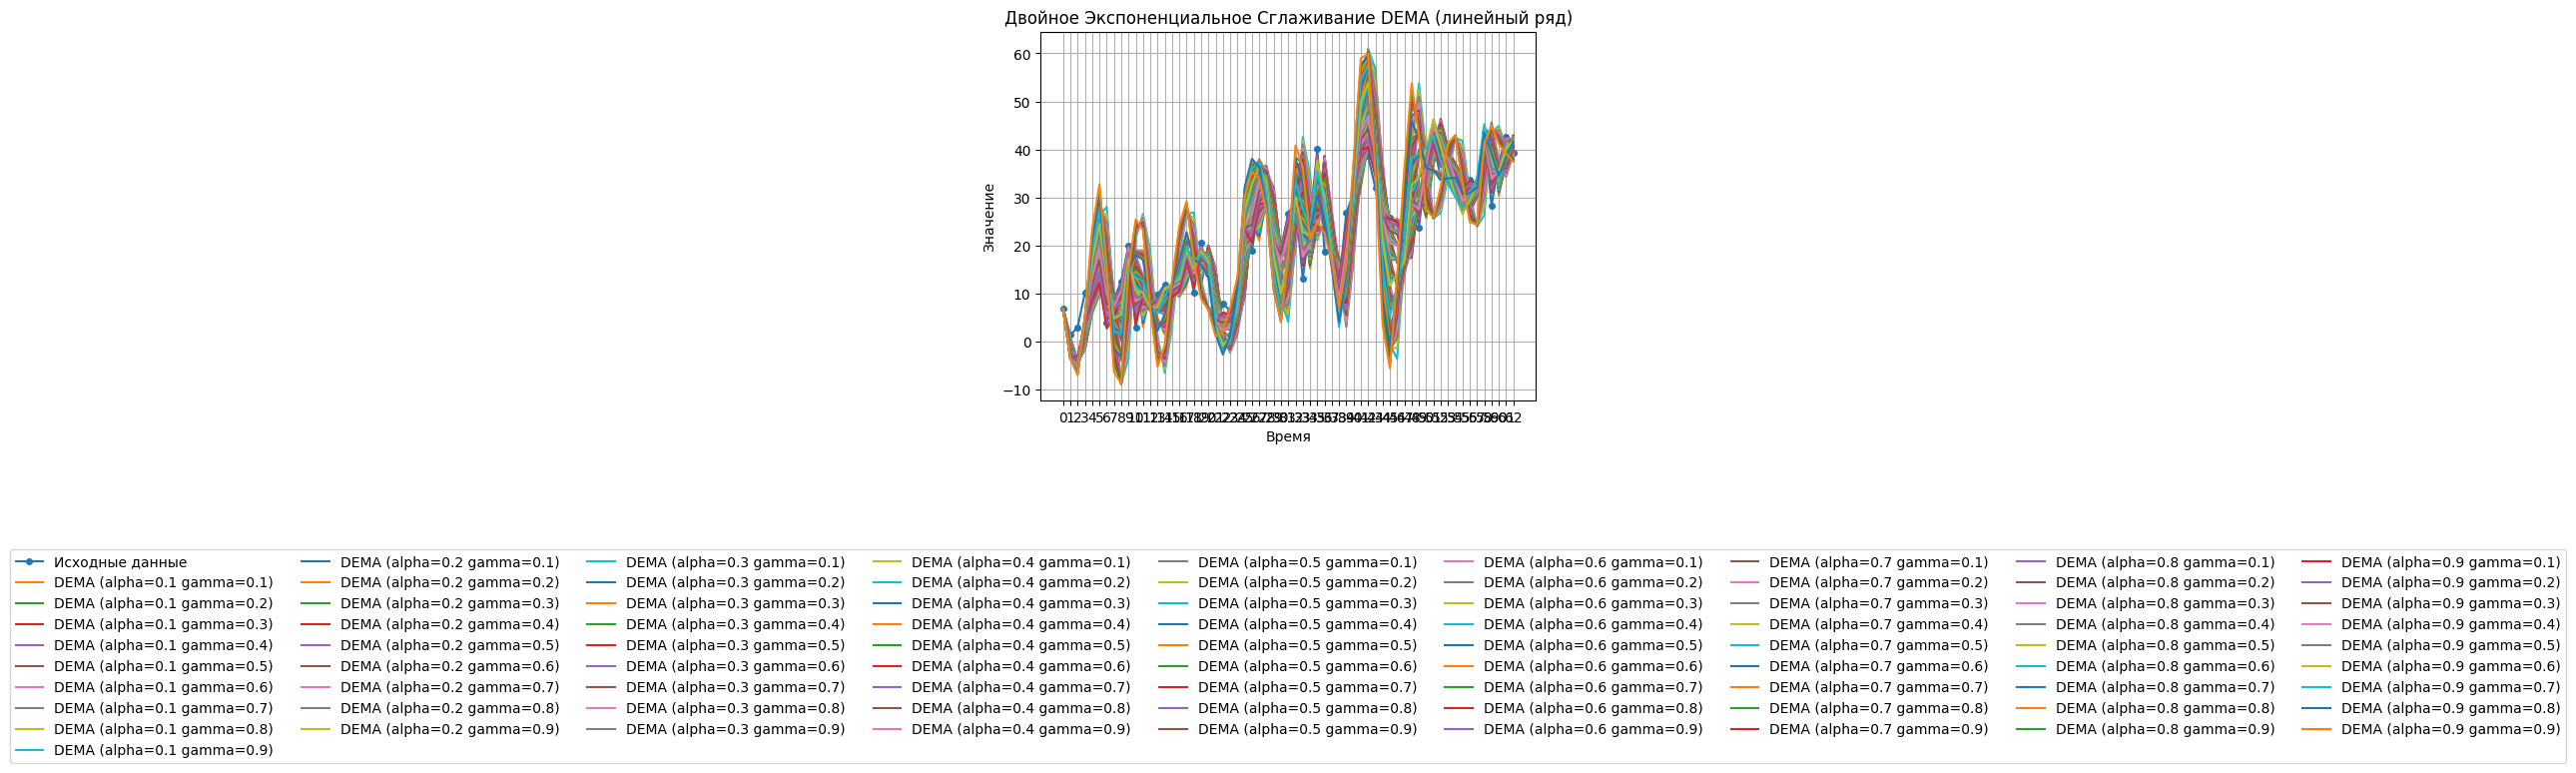

Лучший коэффициент сглаживания для DEMA (линейный ряд): 19 Q-статистика: 2.0821188250546965
Дарбин-Уотсон DEMA (линейный ряд): [2.05977746]


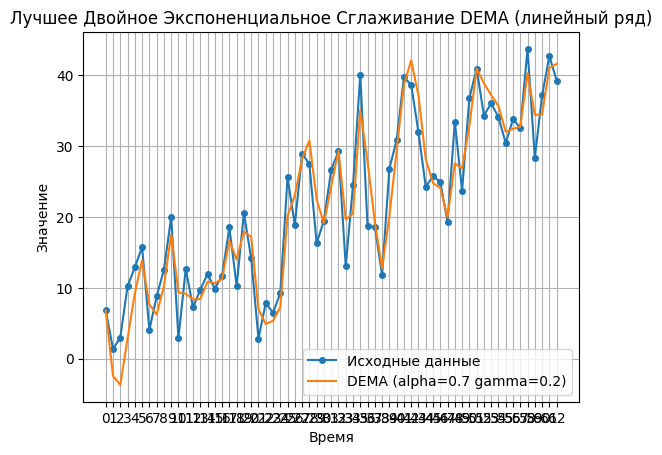

In [ ]:
plt.plot(y2, label='Исходные данные', marker='o', markersize=4)

for alpha in alpha_values:
  for gamma in gamma_values:
      dema_values = dema(y2, alpha,gamma)
      plt.plot(dema_values, label=f'DEMA (alpha={round(alpha, 1)} gamma={round(gamma, 1)})')
plt.title('Двойное Экспоненциальное Сглаживание DEMA (линейный ряд)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(range(len(y2)))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -1), ncol=9)
plt.grid()
plt.show()


best_alpha,best_gamma, q_stat = optimize_dema(y2, alpha_values,gamma_values)
print("Лучший коэффициент сглаживания для DEMA (линейный ряд):", best_window, "Q-статистика:", q_stat)
yt_best = dema(y2, best_alpha,best_gamma)
residuals = y2 - yt_best
dw_stat = durbin_watson(residuals)
print("Дарбин-Уотсон DEMA (линейный ряд):", dw_stat)

plt.plot(y2, label='Исходные данные', marker='o', markersize=4)
plt.plot(yt_best, label=f'DEMA (alpha={round(best_alpha, 1)} gamma={round(best_gamma, 1)})')
plt.title('Лучшее Двойное Экспоненциальное Сглаживание DEMA (линейный ряд)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(range(len(y2)))
plt.legend()
plt.grid()
plt.show()